Basic Neural Network for Deep Learning Teaching

1.) Load and Preprocessing Data

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import  to_categorical
import  numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

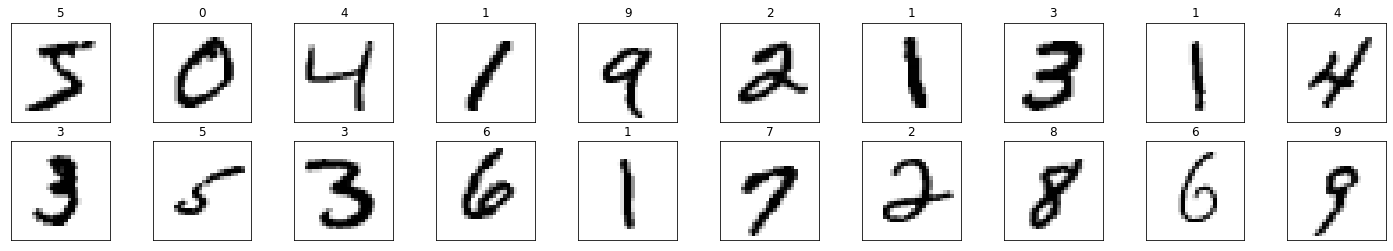

In [4]:
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
   ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
   ax.imshow(x_train[idx], cmap=plt.cm.binary)
   ax.set_title(str(y_train[idx]))

In [5]:
x_train = x_train.reshape(60000, 784).astype('float32') / 255
y_train = to_categorical(y_train, num_classes=10)


2.) Define Model

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


3.) Train Model

In [7]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 1s 699us/step - loss: 1.9027 - accuracy: 0.4911

Test Model

In [8]:
_, (x_test_, y_test_) = tf.keras.datasets.mnist.load_data()
x_test = x_test_.reshape(10000, 784).astype('float32') / 255
y_test = to_categorical(y_test_, num_classes=10)



In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)


313/313 [==============================] - 0s 669us/step - loss: 0.4241 - accuracy: 0.8912


In [10]:
print("Test accuracy", test_acc)



Test accuracy 0.8912000060081482


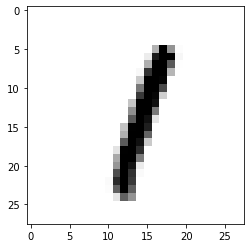

In [11]:
image = 5
_ = plt.imshow(x_test_[image], cmap=plt.cm.binary)

In [12]:
prediction = model.predict(x_test)
print("Model prediction: ", np.argmax(prediction[image]))


Model prediction:  1
